In [1]:
import numpy as np

In [2]:
from numpy.core.fromnumeric import size
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv
from scipy.sparse import base
import seaborn as sns
import random
random.seed(10)
from scvelo.plotting.simulation import show_full_dynamics, compute_dynamics
scv.logging.print_version()
scv.settings.set_figure_params('scvelo', dpi_save=200, dpi=80, transparent=True)
scv.settings.plot_prefix = 'scvelo_fig3_'
scv.settings.verbosity = 2
adata = scv.datasets.pancreatic_endocrinogenesis()
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_neighbors=30, n_pcs=30)
scv.tl.recover_dynamics(adata,n_jobs=10)

Running scvelo 0.2.4 (python 3.7.6) on 2021-12-02 16:08.


Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.


Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


ERROR: Exception:
Traceback (most recent call last):
  File "/Users/shengyuli/anaconda3/envs/veloNN/lib/python3.7/site-packages/pip/_vendor/urllib3/connectionpool.py", line 706, in urlopen
    chunked=chunked,
  File "/Users/shengyuli/anaconda3/envs/veloNN/lib/python3.7/site-packages/pip/_vendor/urllib3/connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "/Users/shengyuli/anaconda3/envs/veloNN/lib/python3.7/site-packages/pip/_vendor/urllib3/connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "/Users/shengyuli/anaconda3/envs/veloNN/lib/python3.7/site-packages/pip/_vendor/urllib3/connection.py", line 426, in connect
    tls_in_tls=tls_in_tls,
  File "/Users/shengyuli/anaconda3/envs/veloNN/lib/python3.7/site-packages/pip/_vendor/urllib3/util/ssl_.py", line 450, in ssl_wrap_socket
    sock, context, tls_in_tls, server_hostname=server_hostname
  File "/Users/shengyuli/anaconda3/envs/veloNN/lib/python3.7/site-packages/pip/_vendor/urllib3

    finished (0:00:06)
computing moments based on connectivities
    finished (0:00:00)
recovering dynamics (using 10/16 cores)


  0%|          | 0/1298 [00:00<?, ?gene/s]

    finished (0:03:08)


In [15]:

# backup of gene, celltype
gene_plot_l_28=["Ank","Abcc8","Tcp11","Nfib","Ppp3ca",# 28 genes after did the re_clustering
            "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
            "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
            "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
            "Adk","Smoc1","Mapre3","Pim2","Tspan7",
            "Top2a","Rap1b","Sulf2"]
gene_plot_l_3=["Wfdc15b","Abcc8","Sulf2"] # 3 picked sample genes
gene_plot_l_all=adata.var_names # TO DO: If we output the heatmap, there contains some NAN when we check the nalist in the heatmap function. This problem needs to be figured out later.
cell_type=["Ductal",
            "Ngn3 low EP",
            "Ngn3 high EP",
            "Pre-endocrine",
            "Alpha",
            "Beta",
            "Delta",
            "Epsilon"]

def violinplt(k0,gene,path):
    plt.figure(figsize=(6,4))
    sns.set_context("talk", font_scale=1.1)
    plt.figure(figsize=(8,6))
    plt.ylim(-0.6, 2)
    sns.violinplot(y="alpha", 
                x="clusters", 
                data=k0,order=cell_type,color="white", inewidth=0.1, width=1.5, inner=None)
    sns.stripplot(y="alpha", 
                x="clusters", 
                data=k0,
            color="black", edgecolor="gray",s=1,alpha=0.1,order=cell_type)
    k0.to_csv(path+gene+".csv",index=False)
    plt.savefig(path+gene+".pdf")

def boxplt(k0,gene,path):
    greyset=['grey']*8
    fin_matrix=pd.DataFrame()
    for ct in cell_type:
        fin_matrix=pd.concat([fin_matrix,k0[k0.clusters==ct].alpha],axis=1)
    #fin_matrix.to_csv("output/heatmap/alpha_allcell/alpha_e"+str(e_num)+".csv",index=False)
    fin_matrix.columns=cell_type

    data=fin_matrix
    #boxlist=fin_matrix["gene",]
    #data=pd.DataFrame()
    #for ct in cell_type:
    #    data=pd.concat([data,pd.DataFrame({'col':boxlist[boxlist.clusters==ct].alpha_new})],axis=1,ignore_index=True)
    plt.figure()
    #plt.ylim(-1, 1)
    #data=np.log10(data)
    for i,d in enumerate(data):
        y = data[d]
        x = np.random.normal(i+1, 0.04, len(y))
        plt.plot(x, y, mfc = greyset[i], mec='k', ms=3, marker="o", linestyle="None",alpha=0.2,markeredgewidth=0.0)
    data.boxplot(showfliers=False,grid=False,color=dict(boxes='black', whiskers='black', medians='black', caps='black')).set(title=gene)
    data.to_csv(path+gene+".csv",index=False)
    plt.savefig(path+gene+".pdf")

def get_k_matrix(ut,st,gene):
    #pl.scatter(st, ut)
    k=ut[500]/st[500]
    start_point=np.array((st[0], ut[0]))
    end_point=np.array((st[999], ut[999]))

    s0=pd.DataFrame(adata.layers['Ms'],columns=adata.var_names)
    u0=pd.DataFrame(adata.layers['Mu'],columns=adata.var_names)
    k0=u0/s0

    #### Reason of using dist_point0 and 999
    # ax = pl.gca()
    # ax.scatter(st[0:500,:],ut[0:500,:], color="b")
    # ax.scatter(st[501:1000,:],ut[501:1000,:], color="r")
    # ax.scatter(st[500],ut[500], color="orange")
    # ax.scatter(s0[gene],u0[gene], color="purple",alpha=0.2)

    k0['dist_point0']=((s0[gene]-st[0])**2+(u0[gene]-ut[0])**2)**0.5
    k0['dist_point999']=((s0[gene]-st[999])**2+(u0[gene]-ut[999])**2)**0.5
    #k0["alpha"]=0
    k0.loc[k0[gene]>k[0],"alpha"]=adata.var.fit_alpha[gene]
    k0.loc[k0[gene]<k[0],"alpha"]=0
    k0.loc[(s0[gene]==0) & (u0[gene]==0),"alpha"]=adata.var.fit_alpha[gene]
    k0.loc[(pd.isna(k0.alpha))&(k0.dist_point0<k0.dist_point999),'alpha']=adata.var.fit_alpha[gene]
    #nalist.append(k0.loc[(pd.isna(k0.alpha))].shape[0])
    k0=pd.concat([k0,adata.obs.clusters.reset_index(drop=True)],axis=1)
    return (k0)

def violinplt_muti_gene(genelist,path_v):
    for gene in genelist:
        _, ut, st = compute_dynamics(adata, basis=gene, key='fit', extrapolate=True)
        k0=get_k_matrix(ut, st,gene)
        violinplt(k0,gene,path_v)

def boxplt_muti_gene(genelist,path_box):
    for gene in genelist:
        _, ut, st = compute_dynamics(adata, basis=gene, key='fit', extrapolate=True)
        k0=get_k_matrix(ut, st,gene)
        boxplt(k0,gene,path_box)

def heatmap_full(cell_type,gene_plot_l,path_heat_alpha):
    alpha_heatmap=pd.DataFrame()
    nalist=list()
    for gene in gene_plot_l:
        _, ut, st = compute_dynamics(adata, basis=gene, key='fit', extrapolate=True)
        #pl.scatter(st, ut)
        k=ut[500]/st[500]
        start_point=np.array((st[0], ut[0]))
        end_point=np.array((st[999], ut[999]))

        s0=pd.DataFrame(adata.layers['Ms'],columns=adata.var_names)
        u0=pd.DataFrame(adata.layers['Mu'],columns=adata.var_names)
        k0=u0/s0

        k0['dist_point0']=((s0[gene]-st[0])**2+(u0[gene]-ut[0])**2)**0.5
        k0['dist_point999']=((s0[gene]-st[999])**2+(u0[gene]-ut[999])**2)**0.5
        #k0["alpha"]=0
        k0.loc[k0[gene]>k[0],"alpha"]=adata.var.fit_alpha[gene]
        k0.loc[k0[gene]<k[0],"alpha"]=0
        k0.loc[(s0[gene]==0) & (u0[gene]==0),"alpha"]=adata.var.fit_alpha[gene]
        k0.loc[(pd.isna(k0.alpha))&(k0.dist_point0<k0.dist_point999),'alpha']=adata.var.fit_alpha[gene]
        nalist.append(k0.loc[(pd.isna(k0.alpha))].shape[0])

        alpha_heatmap=pd.concat([alpha_heatmap,k0.alpha],axis=1)
    alpha_heatmap=pd.concat([adata.obs.clusters.reset_index(drop=True),alpha_heatmap],axis=1)
    index_heat=gene_plot_l.copy()
    index_heat.insert(0,"clusters")
    alpha_heatmap.columns=index_heat
    heatmap_alpha_sorted = alpha_heatmap.reindex(columns=cell_type)

    heatmap_fin=pd.DataFrame()
    for ct in cell_type:
        heatmap_fin=pd.concat([heatmap_fin,alpha_heatmap[alpha_heatmap['clusters']==ct].reset_index()],axis=0)
        print(alpha_heatmap[alpha_heatmap['clusters']==ct])
    heatmap_fin=heatmap_fin.T
    heatmap_fin.to_csv(path_heat_alpha,index=True)
    return(heatmap_fin)


In [16]:
# define cell type and genes
cell_type=["Ductal",
        "Ngn3 low EP",
        "Ngn3 high EP",
        "Pre-endocrine",
        "Alpha",
        "Beta",
        "Delta",
        "Epsilon"]
gene_plot_l=gene_plot_l_3 #["Wfdc15b","Abcc8","Sulf2"]


computing velocities
    finished (0:00:04)
(2000, 23)


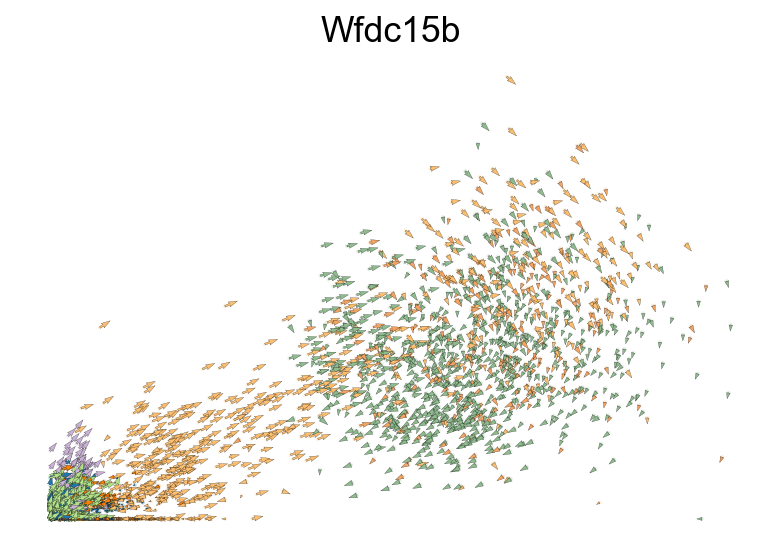

computing velocities
    finished (0:00:04)
(2000, 23)


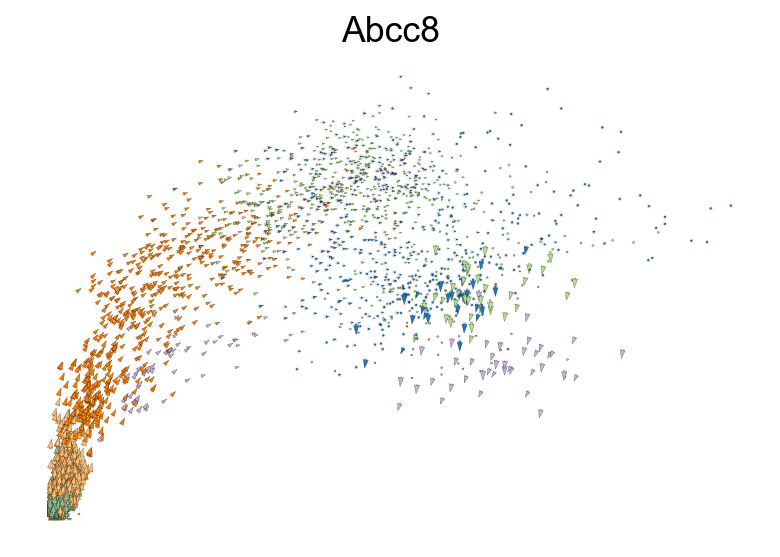

computing velocities
    finished (0:00:04)
(2000, 23)


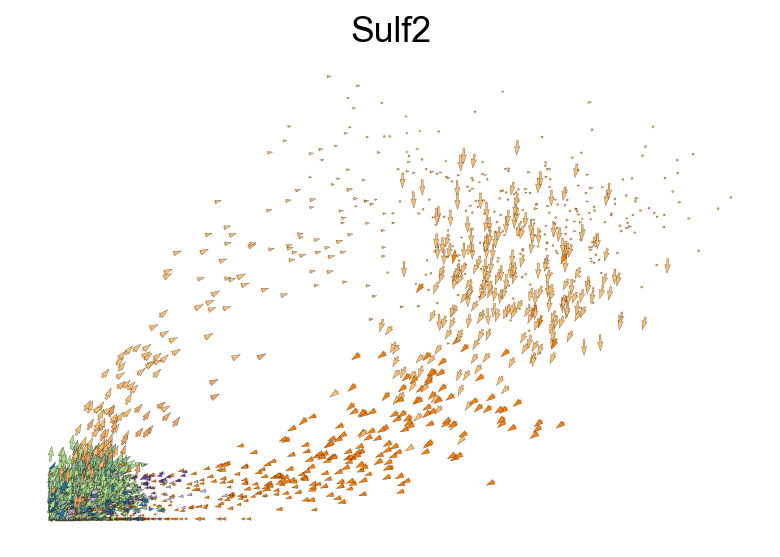

In [17]:
# scvelo plot - the default velocity
for g in gene_plot_l:
    scv.tl.velocity(adata, vkey='dynamical_velocity', mode='dynamical')
    scv.pl.velocity_embedding(adata, vkey='dynamical_velocity', basis=g,
                            fontsize=16, frameon=False, legend_loc='none')
    # TO DO: Below line of savefig only save an empty figure, currently we can only download a png from the interface
    # plt.savefig("output/scvelo_velocity/"+g+".pdf")


(2000, 23)
(2000, 23)
(2000, 23)
(2000, 23)


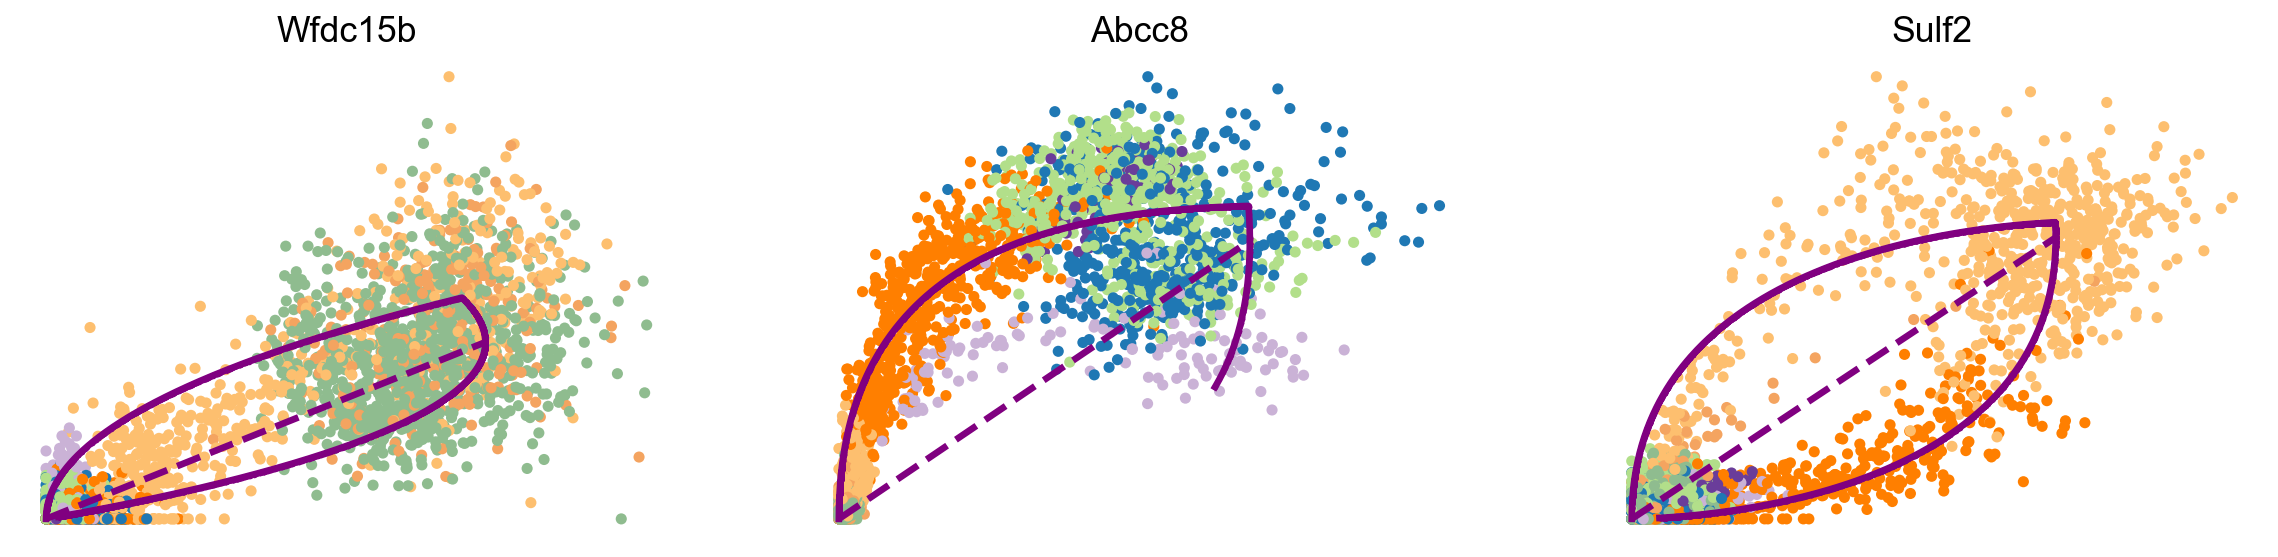

In [18]:
# scvelo plot - the (s,u) and learned dynamics 
scv.pl.scatter(adata, basis=gene_plot_l, fontsize=16, size=100, linewidth=3,
        frameon=False, legend_loc='none')

<Figure size 480x320 with 0 Axes>

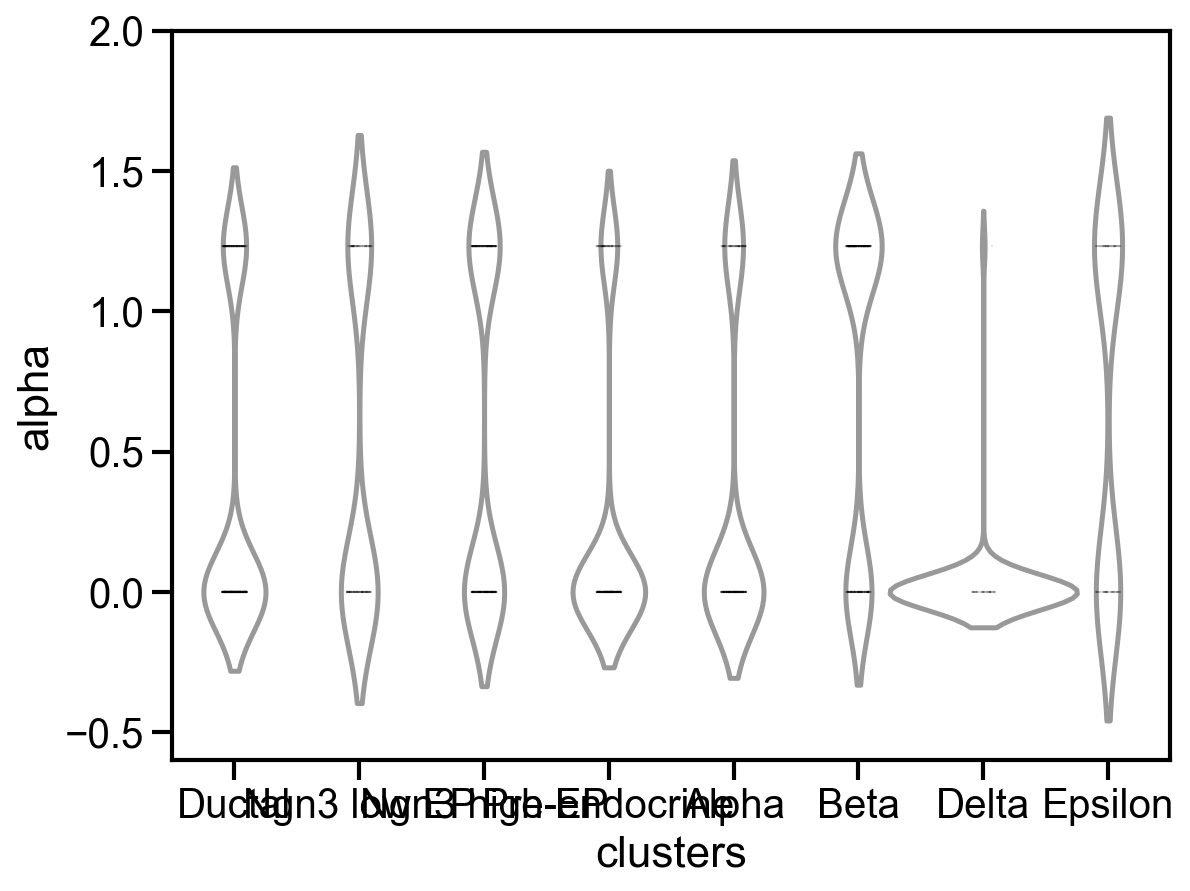

<Figure size 480x320 with 0 Axes>

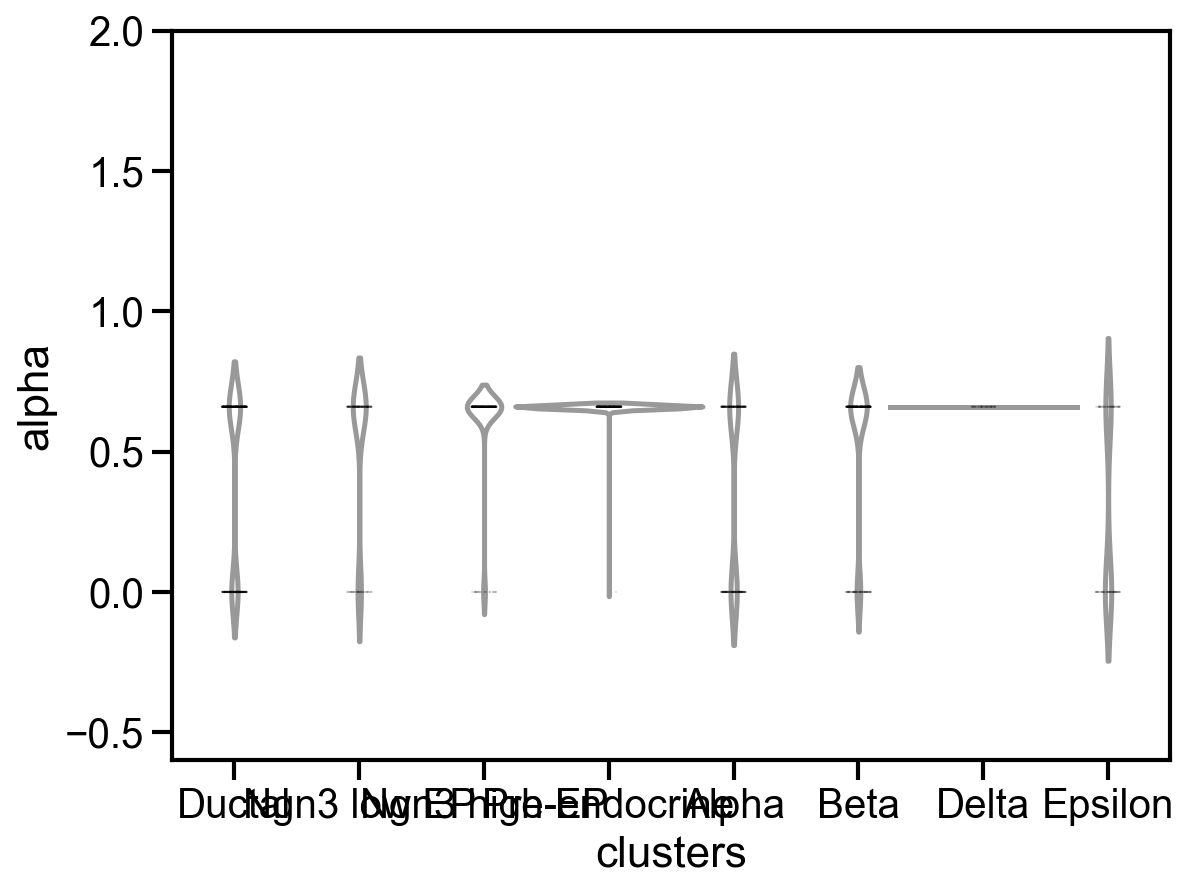

<Figure size 480x320 with 0 Axes>

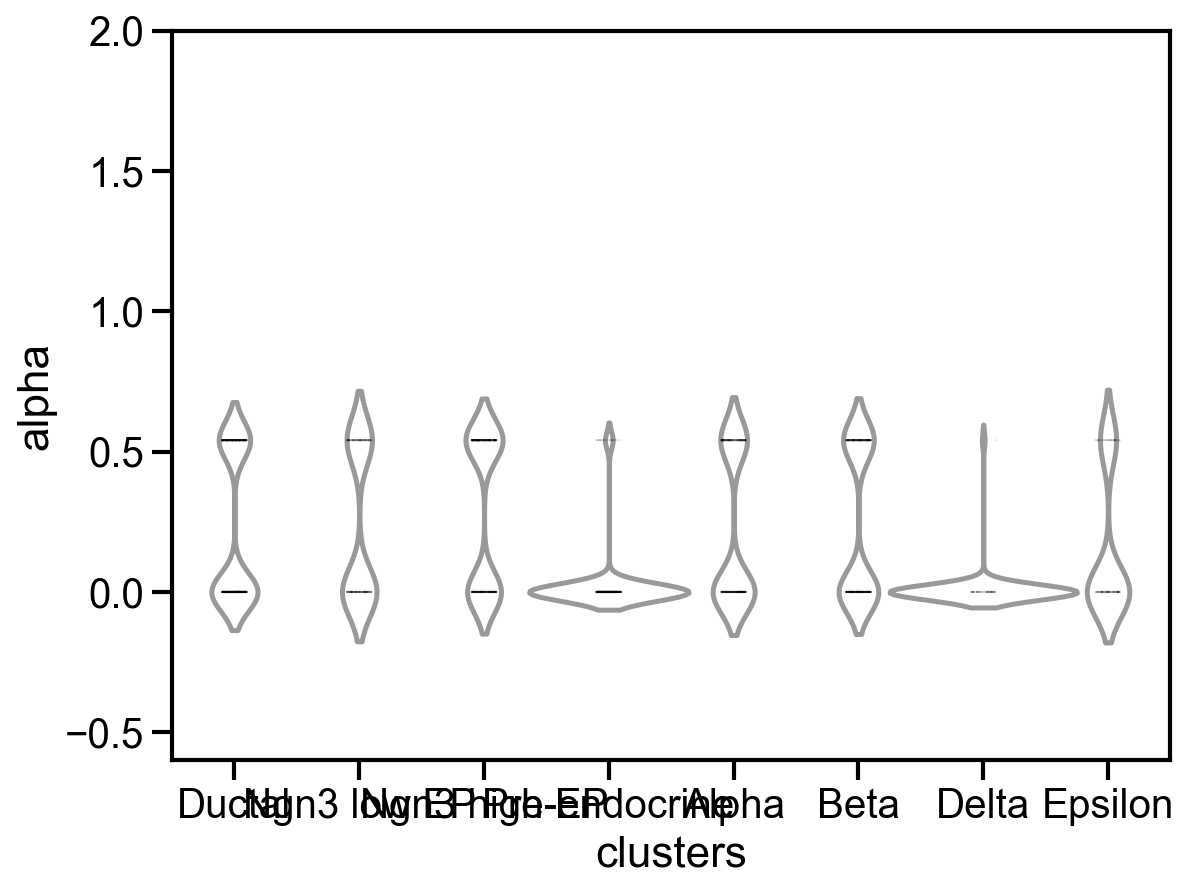

In [19]:
# scvelo plot - violin plot
path_v="output/alpha_plot/violin/scvelo_"
violinplt_muti_gene(gene_plot_l,path_v)

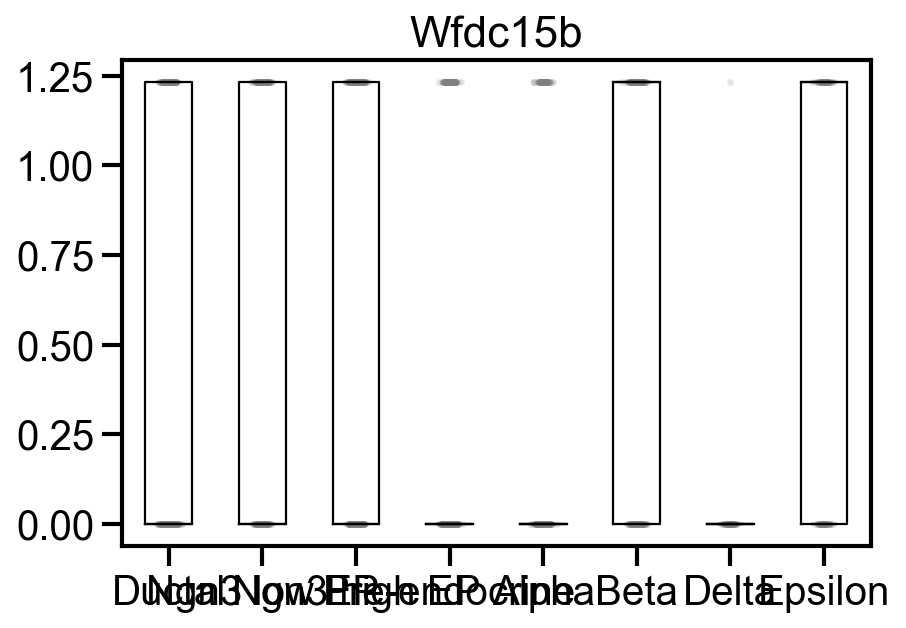

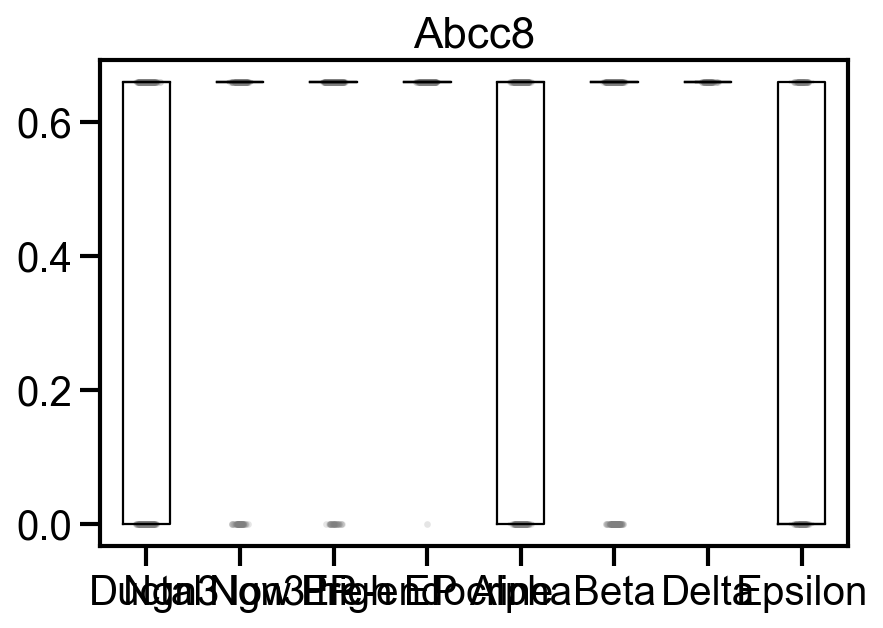

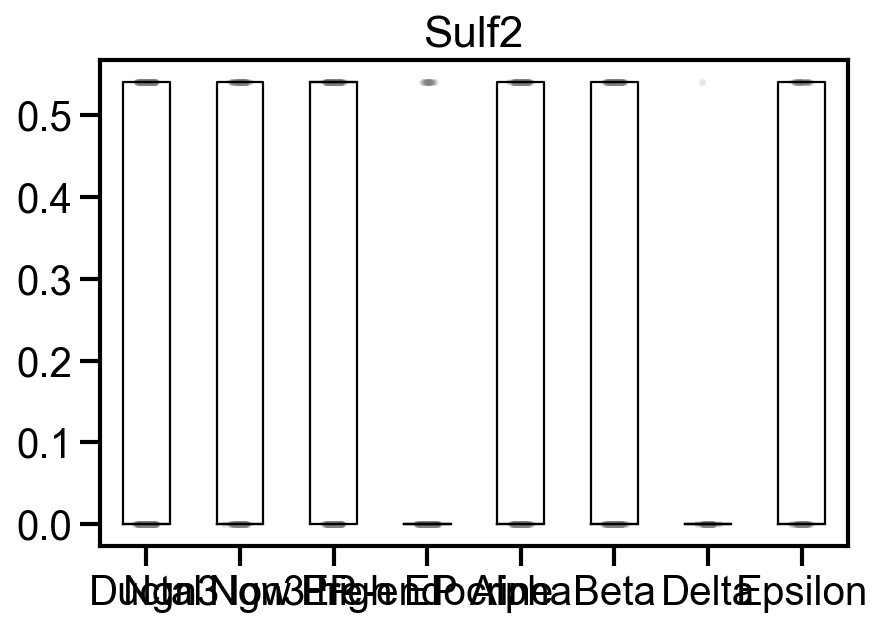

In [20]:
# scvelo plot - box plot
path_box="output/alpha_plot/box/scvelo_"
boxplt_muti_gene(gene_plot_l,path_box)

In [21]:
# alpha heatmap
gene_plot_l=gene_plot_l_28
path_heat_alpha="output/heatmap/alpha_allcell/scvelo/alpha_scvelo.csv"
heatmap=heatmap_full(cell_type,gene_plot_l,path_heat_alpha)

     clusters       Ank     Abcc8     Tcp11      Nfib    Ppp3ca    Rbfox3  \
1      Ductal  1.953458  0.000000  0.393735  0.301362  1.959834  0.000000   
3      Ductal  1.953458  0.000000  0.393735  0.301362  1.959834  0.535872   
5      Ductal  1.953458  0.660034  0.000000  0.301362  1.959834  0.535872   
7      Ductal  0.000000  0.660034  0.393735  0.301362  0.000000  0.000000   
8      Ductal  0.000000  0.000000  0.393735  0.301362  1.959834  0.535872   
...       ...       ...       ...       ...       ...       ...       ...   
3677   Ductal  1.953458  0.000000  0.393735  0.301362  1.959834  0.535872   
3679   Ductal  0.000000  0.000000  0.393735  0.301362  0.000000  0.535872   
3684   Ductal  1.953458  0.660034  0.393735  0.301362  1.959834  0.535872   
3686   Ductal  1.953458  0.660034  0.393735  0.000000  0.000000  0.535872   
3693   Ductal  1.953458  0.660034  0.393735  0.000000  0.000000  0.535872   

          Cdk1     Gng12     Map1b  ...     Btbd17    Dcdc2a       Adk  \
1

In [22]:
heatmap

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
index,1,3,5,7,8,9,11,13,14,15,...,3528,3554,3562,3571,3579,3593,3636,3641,3682,3695
clusters,Ductal,Ductal,Ductal,Ductal,Ductal,Ductal,Ductal,Ductal,Ductal,Ductal,...,Epsilon,Epsilon,Epsilon,Epsilon,Epsilon,Epsilon,Epsilon,Epsilon,Epsilon,Epsilon
Ank,1.953458,1.953458,1.953458,0.0,0.0,1.953458,0.0,1.953458,1.953458,1.953458,...,1.953458,0.0,1.953458,1.953458,1.953458,1.953458,0.0,1.953458,1.953458,1.953458
Abcc8,0.0,0.0,0.660034,0.660034,0.0,0.660034,0.0,0.0,0.0,0.660034,...,0.0,0.0,0.660034,0.0,0.0,0.660034,0.0,0.0,0.0,0.0
Tcp11,0.393735,0.393735,0.0,0.393735,0.393735,0.393735,0.393735,0.393735,0.393735,0.393735,...,0.0,0.0,0.393735,0.0,0.393735,0.0,0.0,0.0,0.0,0.0
Nfib,0.301362,0.301362,0.301362,0.301362,0.301362,0.301362,0.0,0.301362,0.0,0.301362,...,0.0,0.301362,0.301362,0.0,0.0,0.301362,0.0,0.0,0.301362,0.301362
Ppp3ca,1.959834,1.959834,1.959834,0.0,1.959834,1.959834,0.0,1.959834,1.959834,1.959834,...,1.959834,0.0,0.0,1.959834,0.0,0.0,0.0,1.959834,1.959834,0.0
Rbfox3,0.0,0.535872,0.535872,0.0,0.535872,0.535872,0.535872,0.535872,0.0,0.535872,...,0.0,0.535872,0.535872,0.0,0.0,0.0,0.535872,0.0,0.535872,0.535872
Cdk1,4.224945,0.0,4.224945,4.224945,0.0,0.0,4.224945,4.224945,4.224945,0.0,...,0.0,0.0,0.0,4.224945,4.224945,4.224945,0.0,0.0,0.0,4.224945
Gng12,2.057752,2.057752,2.057752,2.057752,0.0,2.057752,0.0,2.057752,2.057752,0.0,...,2.057752,2.057752,2.057752,0.0,2.057752,2.057752,2.057752,0.0,2.057752,2.057752
